In [4]:
from __future__ import division
import numpy as np
from scipy.integrate import odeint

[  5.00000000e+00   6.87162781e+00   9.62024723e+00   1.35562740e+01
   1.90999975e+01   2.68204710e+01   3.74881667e+01   5.21462706e+01
   7.22072095e+01   9.95833467e+01   1.36863937e+02   1.87554715e+02
   2.56402291e+02   3.49833365e+02   4.76549399e+02   6.48331788e+02
   8.81132018e+02   1.19654769e+03   1.62382099e+03   2.20254454e+03
   2.98632499e+03   4.04774337e+03   5.48507113e+03   7.43136348e+03
   1.00667712e+04   1.36352106e+04   1.84669331e+04   2.50090850e+04
   3.38670820e+04   4.58606303e+04   6.20995755e+04   8.40865992e+04
   1.13856265e+05   1.54163283e+05   2.08737406e+05   2.82628554e+05
   3.82674095e+05   5.18131520e+05   7.01535060e+05   9.49855506e+05
   1.28607055e+06   1.74129098e+06   2.35763940e+06   3.19214794e+06
   4.32203558e+06   5.85185339e+06   7.92315884e+06   1.07276145e+07
   1.45247228e+07   1.96658387e+07   2.66266810e+07   3.60513520e+07
   4.88119374e+07   6.60892023e+07   8.94818504e+07   1.21154455e+08
   1.64037753e+08   2.22099829e+08

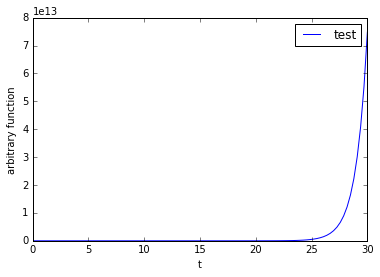

In [10]:
def test_torque(t):
    return t*2

def test_model(y, t):
    dy = y[0] + test_torque(t)
    return [dy]

t = np.linspace(0.0, 30.0, 100)
y_init = np.array([5.0])
y = odeint(test_model, y_init, t)

print y[:, 0]

plot.plot(t, y[:,0], label="test")
plot.xlabel("t")
plot.ylabel("arbitrary function")
plot.legend()
plot.show()

In [9]:
# CONSTANTS
wheel_radius = # m 
cart_mass = # kg
spring_const = # N/m => kg/s^2
inertial_mass = # (is this moment of inertia)
mag_mass = # kg
pin_dist = # m - distance from center of wheel to rigid arm pin
ra_length = # m - length of the rigid arm
rail_height = # m - vertical distance from the rail to the center of the wheel

# MMF specifics
b0 = 
u0 = 
mag_length = 
mag_radius = 
pole_area = 
mag2_dist = # m - horizontal distance from center of wheel to second magnet
perm =

# INPUT FUNCTIONS
def input_torque(t):
    """
        input torque as a function of time.
    
        Parameters
        ----------
        t : {numpy array}
            timeseries with appropriate range
    """
    # TODO : define an equation for the input torque
    
    return 1.0

def mag_force(theta):
    """
        repelling force as a function of distance between the two magnets.
        distance between magnets is function of theta.
        
        Parameters
        ----------
        theta : {numpy.array}
    """
    # compute L - distance from the center of the wheel to the magnet
    center_dist = pin_dist * np.cos(theta) + \
        np.sqrt(ra_length**2 - (rail_height + pin_dist * np.sin(theta)))
        
    # separation between magnets
    sep = mag2_dist - center_dist
        
    # TODO: compute magnetomotive force
    
    # magnetomotive force - assumes cylindrical bar magnets
    force = ((b0**2 * pole_area**2 * (mag_length**2 + mag_radius**2))/(np.pi*perm * mag_length**2)) * \
        (1/sep**2 + 1/(sep + 2*mag_length)**2 - 2/(sep + mag_length)**2)
    
    return force

# SIMULATION
def model_1(y, t):
    """
        generate series of RHS equations from system 1 to be passed
        into solver.
        
        Parameters
        ----------
        y : {numpy.array}
            initial conditions for system
        
        t : {numpy.array}
            timeseries with appropriate range
    """
    p2 = y[0]
    
    dp2 = input_torque(t) / (1 + (R**2)*mag1_mass/intertial_mass)
    dtheta = p2/inertial_mass
    
    return [dp2, dtheta]
    
def model_2(y, t):
    """
        generate series of RHS equations from system 2 to be passed
        into solver.

        Parameters
        ----------
        y : {numpy.array}
            initial conditions for system

        t : {numpy.array}
            timeseries with appropriate range
    """
    q8 = y[0]
    p7 = y[1]
    theta = y[2]
    
    dp7 = (mag_force(theta) * q8/spring_const)/(1 + mag2_mass/cart_mass)
    dq8 = p7/cart_mass

    return [dp7, dq8]

# initial conditions
p2_0 = # angular momentum (2)
q8_0 = # spring displacement (8)
p7_0 = # momentum (7)

time = np.linspace(0.0, 30.0, 100) # 100 points between 0 and 30 seconds

"""
    We compute angular momentum and theta first as we've split the two
    systems and because the magnetomotive repelling force is a function
    of theta.
"""
y_init_1 = np.array([p2_0])

# angular momentum and theta
y1 = odeint(model_1, y_init_1, time)

p2 = y1[:,0]

theta = y1[:,1]

y_init_2 = np.array([q8_0, p7_0, theta])

# spring displacement and cart momentum
y2 = odeint(model_2, y_init_2, time)

# TODO: PLOT

SyntaxError: invalid syntax (<ipython-input-9-5cc3f9fd1a1d>, line 2)